In [10]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


In [11]:


# 1. Define Project and Data Paths
project_root = Path(r"C:\Users\THINKPAD\Desktop\10_Academy\Week_10\ethiopia-fi-forecast")

# Folders
raw_data_folder = project_root / "data" / "raw"
processed_data_folder = project_root / "data" / "processed"

# Files
enriched_file = processed_data_folder / "ethiopia_fi_unified_data_enriched.xlsx"

# 2. Load Enriched Datase
data = pd.read_excel(enriched_file, sheet_name="ethiopia_fi_unified_data", engine="openpyxl")
impact_links = pd.read_excel(enriched_file, sheet_name="Impact_sheet", engine="openpyxl")

print("Enriched Unified Data shape:", data.shape)
print("Enriched Impact Links shape:", impact_links.shape)

# Quick preview
display(data.head())
display(impact_links.head())

Enriched Unified Data shape: (51, 34)
Enriched Impact Links shape: (17, 35)


,record_id,record_type,category,pillar,indicator,indicator_code,indicator_direction,value_numeric,value_text,value_type,...,impact_direction,impact_magnitude,impact_estimate,lag_months,evidence_basis,comparable_country,collected_by,collection_date,original_text,notes
0,REC_0001,observation,NaN,ACCESS,Account Ownership Rate,ACC_OWNERSHIP,higher_better,22.0,NaN,percentage,...,NaN,NaN,NaN,NaN,NaN,Example_Trainee,2025-01-20,NaN,Baseline year,NaN
1,REC_0002,observation,NaN,ACCESS,Account Ownership Rate,ACC_OWNERSHIP,higher_better,35.0,NaN,percentage,...,NaN,NaN,NaN,NaN,NaN,Example_Trainee,2025-01-20,NaN,NaN,NaN
2,REC_0003,observation,NaN,ACCESS,Account Ownership Rate,ACC_OWNERSHIP,higher_better,46.0,NaN,percentage,...,NaN,NaN,NaN,NaN,NaN,Example_Trainee,2025-01-20,NaN,NaN,NaN
3,REC_0004,observation,NaN,ACCESS,Account Ownership Rate,ACC_OWNERSHIP,higher_better,56.0,NaN,percentage,...,NaN,NaN,NaN,NaN,NaN,Example_Trainee,2025-01-20,NaN,Gender disaggregated,NaN
4,REC_0005,observation,NaN,ACCESS,Account Ownership Rate,ACC_OWNERSHIP,higher_better,36.0,NaN,percentage,...,NaN,NaN,NaN,NaN,NaN,Example_Trainee,2025-01-20,NaN,Gender disaggregated,NaN


,record_id,parent_id,record_type,category,pillar,indicator,indicator_code,indicator_direction,value_numeric,value_text,...,impact_direction,impact_magnitude,impact_estimate,lag_months,evidence_basis,comparable_country,collected_by,collection_date,original_text,notes
0,IMP_0001,EVT_0001,impact_link,NaN,ACCESS,Telebirr effect on Account Ownership,NaN,NaN,15.0,NaN,...,increase,high,15.0,12,literature,Kenya,Example_Trainee,2025-01-20,NaN,Kenya M-Pesa showed +20pp over 5 years
1,IMP_0002,EVT_0001,impact_link,NaN,USAGE,Telebirr effect on Telebirr Users,NaN,NaN,NaN,NaN,...,increase,high,NaN,3,empirical,NaN,Example_Trainee,2025-01-20,NaN,Direct subscriber acquisition
2,IMP_0003,EVT_0001,impact_link,NaN,USAGE,Telebirr effect on P2P Transactions,NaN,NaN,25.0,NaN,...,increase,high,25.0,6,empirical,NaN,Example_Trainee,2025-01-20,NaN,New digital payment channel
3,IMP_0004,EVT_0002,impact_link,NaN,ACCESS,Safaricom effect on 4G Coverage,NaN,NaN,15.0,NaN,...,increase,medium,15.0,12,empirical,NaN,Example_Trainee,2025-01-20,NaN,Network investment from competition
4,IMP_0005,EVT_0002,impact_link,NaN,AFFORDABILITY,Safaricom effect on Data Affordability,NaN,NaN,-20.0,NaN,...,decrease,medium,-20.0,12,literature,Rwanda,Example_Trainee,2025-01-20,NaN,Competition typically reduces prices


,observation_date,gender,value_numeric,growth_pp
0,2014-12-31,all,22.0,NaN
1,2017-12-31,all,35.0,13.0
2,2021-12-31,all,46.0,11.0
4,2021-12-31,female,36.0,NaN
3,2021-12-31,male,56.0,NaN
5,2024-11-29,all,49.0,3.0
30,2025-12-31,all,70.0,21.0


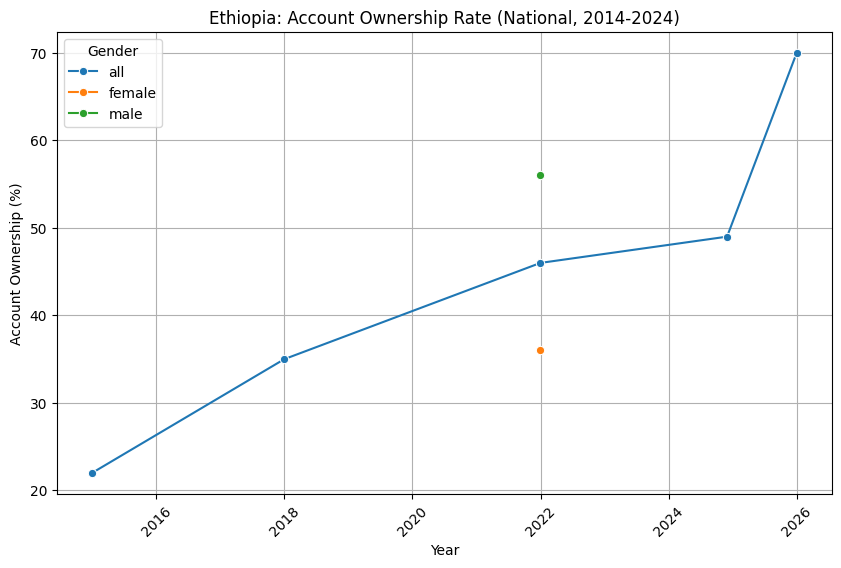

In [12]:

# Filter for Account Ownership indicator
acc_ownership = data[
    (data['indicator_code'] == 'ACC_OWNERSHIP') & 
    (data['location'] == 'national')
].copy()

# Ensure dates are datetime
acc_ownership['observation_date'] = pd.to_datetime(acc_ownership['observation_date'])

# Sort by date
acc_ownership.sort_values(['observation_date', 'gender'], inplace=True)

# Calculate growth between survey years (percentage points)
acc_ownership['growth_pp'] = acc_ownership.groupby('gender')['value_numeric'].diff()

# Quick check
display(acc_ownership[['observation_date', 'gender', 'value_numeric', 'growth_pp']])

# Plot trajectory
plt.figure(figsize=(10,6))
sns.lineplot(
    data=acc_ownership,
    x='observation_date', 
    y='value_numeric',
    hue='gender',
    marker='o'
)
plt.title("Ethiopia: Account Ownership Rate (National, 2014-2024)")
plt.ylabel("Account Ownership (%)")
plt.xlabel("Year")
plt.xticks(rotation=45)
plt.grid(True)
plt.legend(title='Gender')
plt.show()


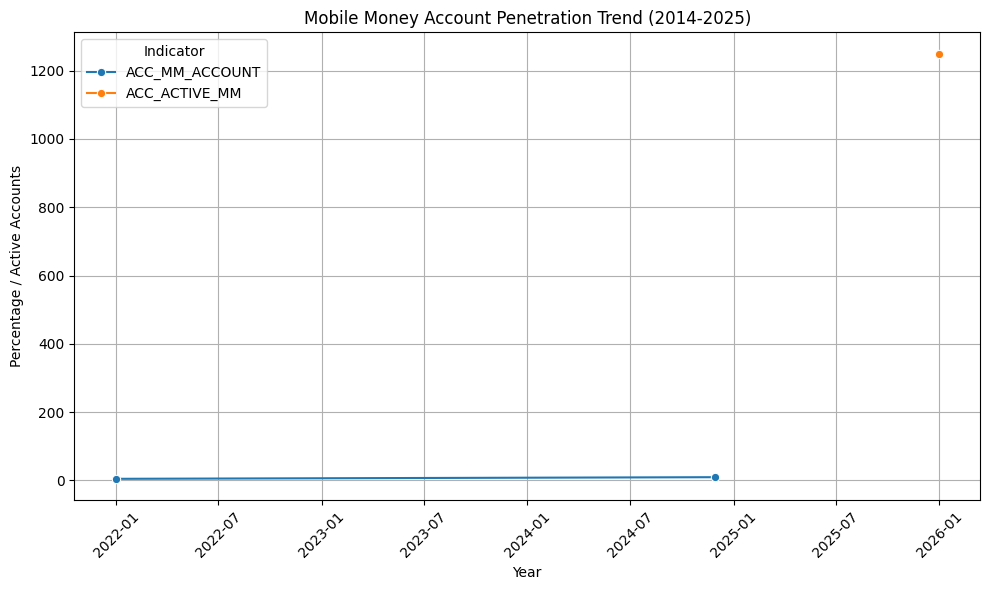

In [13]:

mm_indicators = [
    'ACC_MM_ACCOUNT',       # Mobile money account rate
    'ACC_ACTIVE_MM',        # Active mobile money accounts
    'USG_MM_VALUE_PER_CAPITA',  # Mobile money value per capita
    'USG_P2P_COUNT',        # P2P transactions
    'USG_P2P_VALUE',        # P2P transaction value
    'USG_ATM_COUNT',        # ATM transactions
    'USG_ATM_VALUE',        # ATM transaction value
    'USG_ACTIVE_RATE',      # Mobile money activity rate
    'USG_TELEBIRR_USERS',   # Telebirr registered users
    'USG_TELEBIRR_VALUE',   # Telebirr transaction value
    'USG_MPESA_USERS',      # M-Pesa registered users
    'USG_MPESA_ACTIVE',     # M-Pesa active users
]

mm_data = data[data['indicator_code'].isin(mm_indicators)].copy()

#  Convert observation_date to datetime if not already
mm_data['observation_date'] = pd.to_datetime(mm_data['observation_date'])

#  Plot Mobile Money Account Penetration Trend (2014-2025)
plt.figure(figsize=(10,6))
sns.lineplot(
    data=mm_data[mm_data['indicator_code'].isin(['ACC_MM_ACCOUNT', 'ACC_ACTIVE_MM'])],
    x='observation_date', 
    y='value_numeric', 
    hue='indicator_code',
    marker='o'
)
plt.title("Mobile Money Account Penetration Trend (2014-2025)")
plt.ylabel("Percentage / Active Accounts")
plt.xlabel("Year")
plt.xticks(rotation=45)
plt.grid(True)
plt.legend(title='Indicator')
plt.tight_layout()
plt.show()

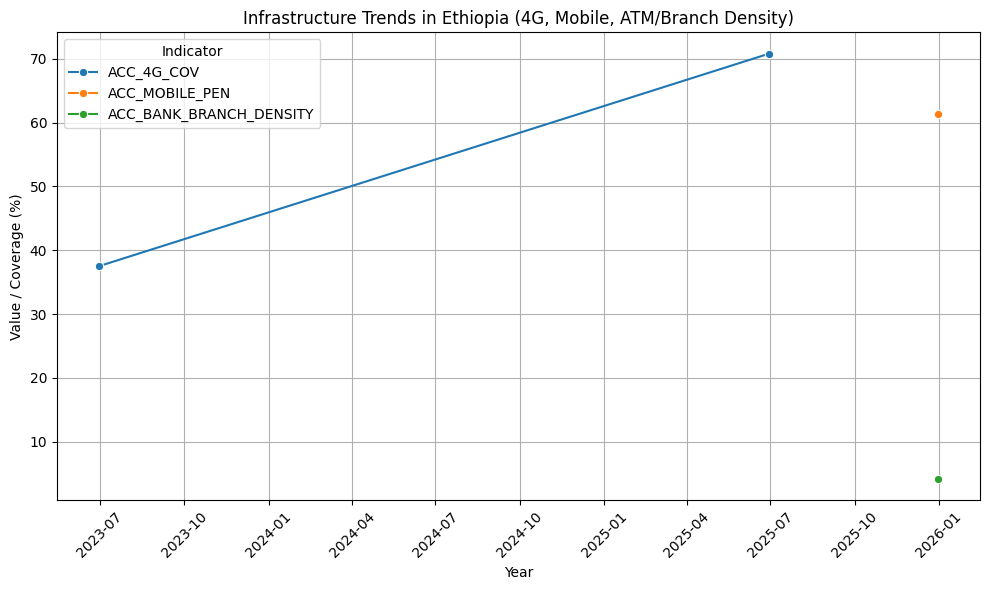

Correlation between infrastructure and account ownership:


,value_numeric,account_ownership
value_numeric,1.0,NaN
account_ownership,NaN,NaN


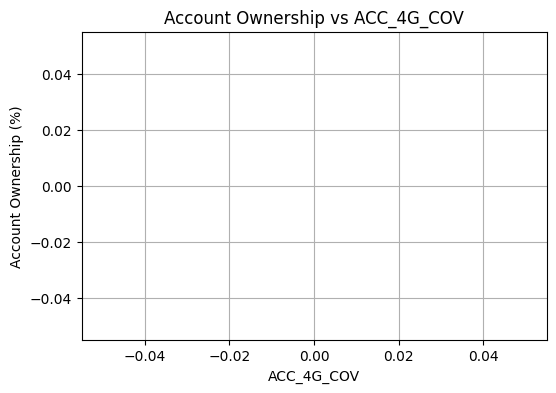

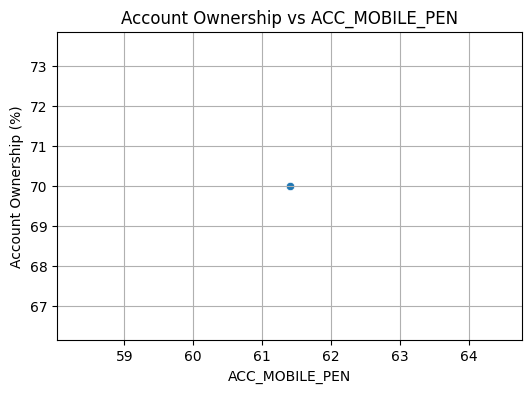

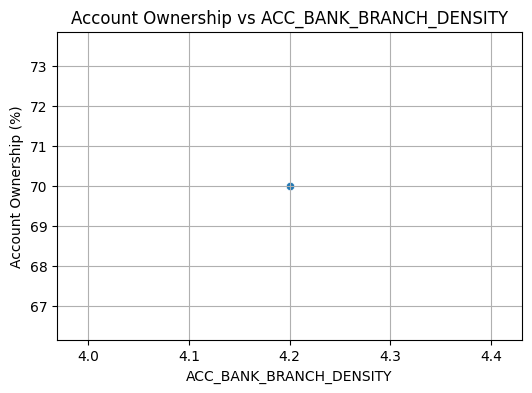

In [14]:
# 1️⃣ Filter for infrastructure-related indicators
infra_indicators = [
    'ACC_4G_COV',        # 4G population coverage
    'ACC_MOBILE_PEN',    # Mobile subscription penetration
    'ACC_BANK_BRANCH_DENSITY',  # Bank branches per 100k adults
]

infra_data = data[data['indicator_code'].isin(infra_indicators)].copy()
infra_data['observation_date'] = pd.to_datetime(infra_data['observation_date'])

# 2️⃣ Plot Infrastructure Trends Over Time
plt.figure(figsize=(10,6))
sns.lineplot(
    data=infra_data, 
    x='observation_date', 
    y='value_numeric', 
    hue='indicator_code', 
    marker='o'
)
plt.title("Infrastructure Trends in Ethiopia (4G, Mobile, ATM/Branch Density)")
plt.ylabel("Value / Coverage (%)")
plt.xlabel("Year")
plt.xticks(rotation=45)
plt.grid(True)
plt.legend(title='Indicator')
plt.tight_layout()
plt.show()

# 3️⃣ Merge infrastructure with account ownership for correlation analysis
acc_data = data[data['indicator_code'] == 'ACC_OWNERSHIP'][['observation_date','value_numeric']].copy()
acc_data.rename(columns={'value_numeric':'account_ownership'}, inplace=True)

infra_acc = pd.merge(infra_data, acc_data, on='observation_date', how='inner')

# 4️⃣ Correlation matrix to examine relationships
corr_matrix = infra_acc[['value_numeric','account_ownership']].corr()
print("Correlation between infrastructure and account ownership:")
display(corr_matrix)

# 5️⃣ Optional: Scatter plots to visualize leading indicators
for ind in infra_indicators:
    subset = infra_acc[infra_acc['indicator_code'] == ind]
    plt.figure(figsize=(6,4))
    sns.scatterplot(x='value_numeric', y='account_ownership', data=subset)
    plt.title(f"Account Ownership vs {ind}")
    plt.xlabel(ind)
    plt.ylabel("Account Ownership (%)")
    plt.grid(True)
    plt.show()


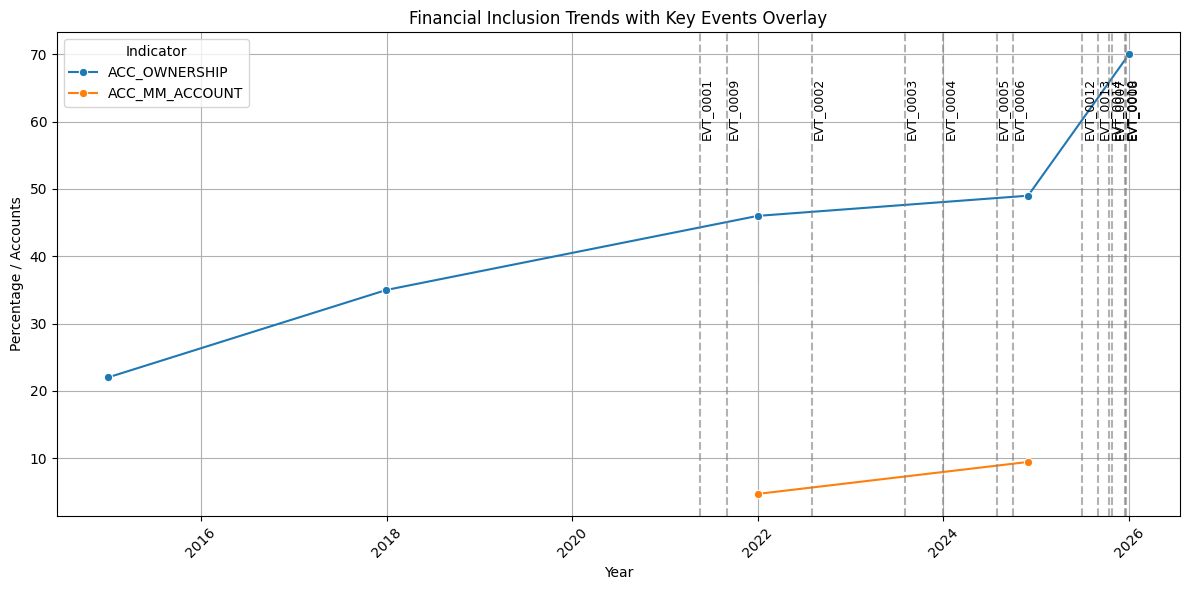

,record_id,record_type,category,pillar,indicator,indicator_code,indicator_direction,value_numeric,value_text,value_type,...,impact_direction,impact_magnitude,impact_estimate,lag_months,evidence_basis,comparable_country,collected_by,collection_date,original_text,notes
0,REC_0001,observation,NaN,ACCESS,Account Ownership Rate,ACC_OWNERSHIP,higher_better,22.00,NaN,percentage,...,NaN,NaN,NaN,NaN,NaN,Example_Trainee,2025-01-20,NaN,Baseline year,NaN
1,REC_0002,observation,NaN,ACCESS,Account Ownership Rate,ACC_OWNERSHIP,higher_better,35.00,NaN,percentage,...,NaN,NaN,NaN,NaN,NaN,Example_Trainee,2025-01-20,NaN,NaN,NaN
2,REC_0003,observation,NaN,ACCESS,Account Ownership Rate,ACC_OWNERSHIP,higher_better,46.00,NaN,percentage,...,NaN,NaN,NaN,NaN,NaN,Example_Trainee,2025-01-20,NaN,NaN,NaN
3,REC_0004,observation,NaN,ACCESS,Account Ownership Rate,ACC_OWNERSHIP,higher_better,56.00,NaN,percentage,...,NaN,NaN,NaN,NaN,NaN,Example_Trainee,2025-01-20,NaN,Gender disaggregated,NaN
4,REC_0005,observation,NaN,ACCESS,Account Ownership Rate,ACC_OWNERSHIP,higher_better,36.00,NaN,percentage,...,NaN,NaN,NaN,NaN,NaN,Example_Trainee,2025-01-20,NaN,Gender disaggregated,NaN
6,REC_0007,observation,NaN,ACCESS,Mobile Money Account Rate,ACC_MM_ACCOUNT,higher_better,4.70,NaN,percentage,...,NaN,NaN,NaN,NaN,NaN,Example_Trainee,2025-01-20,NaN,NaN,NaN
5,REC_0006,observation,NaN,ACCESS,Account Ownership Rate,ACC_OWNERSHIP,higher_better,49.00,NaN,percentage,...,NaN,NaN,NaN,NaN,NaN,Example_Trainee,2025-01-20,Account ownership increased from 46% to 49%,Survey Oct-Nov 2024,NaN
7,REC_0008,observation,NaN,ACCESS,Mobile Money Account Rate,ACC_MM_ACCOUNT,higher_better,9.45,NaN,percentage,...,NaN,NaN,NaN,NaN,NaN,Example_Trainee,2025-01-20,NaN,Doubled from 2021,NaN
30,REC_0031,target,NaN,ACCESS,Account Ownership Rate,ACC_OWNERSHIP,higher_better,70.00,NaN,percentage,...,NaN,NaN,NaN,NaN,NaN,Example_Trainee,2025-01-20,NaN,NFIS-II target,NaN


,observation_date,indicator,record_id,original_text
33,2021-05-17,Telebirr Launch,EVT_0001,First major mobile money service in Ethiopia
41,2021-09-01,NFIS-II Strategy Launch,EVT_0009,5-year national financial inclusion strategy
34,2022-08-01,Safaricom Ethiopia Commercial Launch,EVT_0002,End of state telecom monopoly
35,2023-08-01,M-Pesa Ethiopia Launch,EVT_0003,Second mobile money entrant
36,2024-01-01,Fayda Digital ID Program Rollout,EVT_0004,National biometric digital ID system
37,2024-07-29,Foreign Exchange Liberalization,EVT_0005,Birr float introduced
38,2024-10-01,P2P Transaction Count Surpasses ATM,EVT_0006,Historic: digital > cash for first time
48,2025-07-01,NaN,EVT_0012,NaN
49,2025-09-01,NaN,EVT_0013,NaN
50,2025-10-15,NaN,EVT_0014,NaN


In [15]:
# 1️⃣ Filter event data
events = data[data['record_type'] == 'event'].copy()
events['observation_date'] = pd.to_datetime(events['observation_date'])

# Focus on key financial inclusion events
key_events = events[['observation_date', 'indicator', 'record_id', 'original_text']].copy()
key_events.sort_values('observation_date', inplace=True)

# 2️⃣ Filter observations for account ownership and mobile money accounts
obs_subset = data[data['indicator_code'].isin(['ACC_OWNERSHIP', 'ACC_MM_ACCOUNT'])].copy()
obs_subset['observation_date'] = pd.to_datetime(obs_subset['observation_date'])

# 3️⃣ Plot trends with events overlaid
plt.figure(figsize=(12,6))
sns.lineplot(data=obs_subset, x='observation_date', y='value_numeric', hue='indicator_code', marker='o')

# Overlay events
for idx, row in key_events.iterrows():
    plt.axvline(x=row['observation_date'], color='grey', linestyle='--', alpha=0.6)
    plt.text(
        row['observation_date'], 
        obs_subset['value_numeric'].max()*0.95,  # position text near top
        row['record_id'],
        rotation=90,
        verticalalignment='top',
        fontsize=9,
        color='black'
    )

plt.title("Financial Inclusion Trends with Key Events Overlay")
plt.xlabel("Year")
plt.ylabel("Percentage / Accounts")
plt.xticks(rotation=45)
plt.grid(True)
plt.legend(title='Indicator')
plt.tight_layout()
plt.show()

# 4️⃣ Quick inspection of apparent relationships
display(obs_subset.sort_values('observation_date'))
display(key_events)


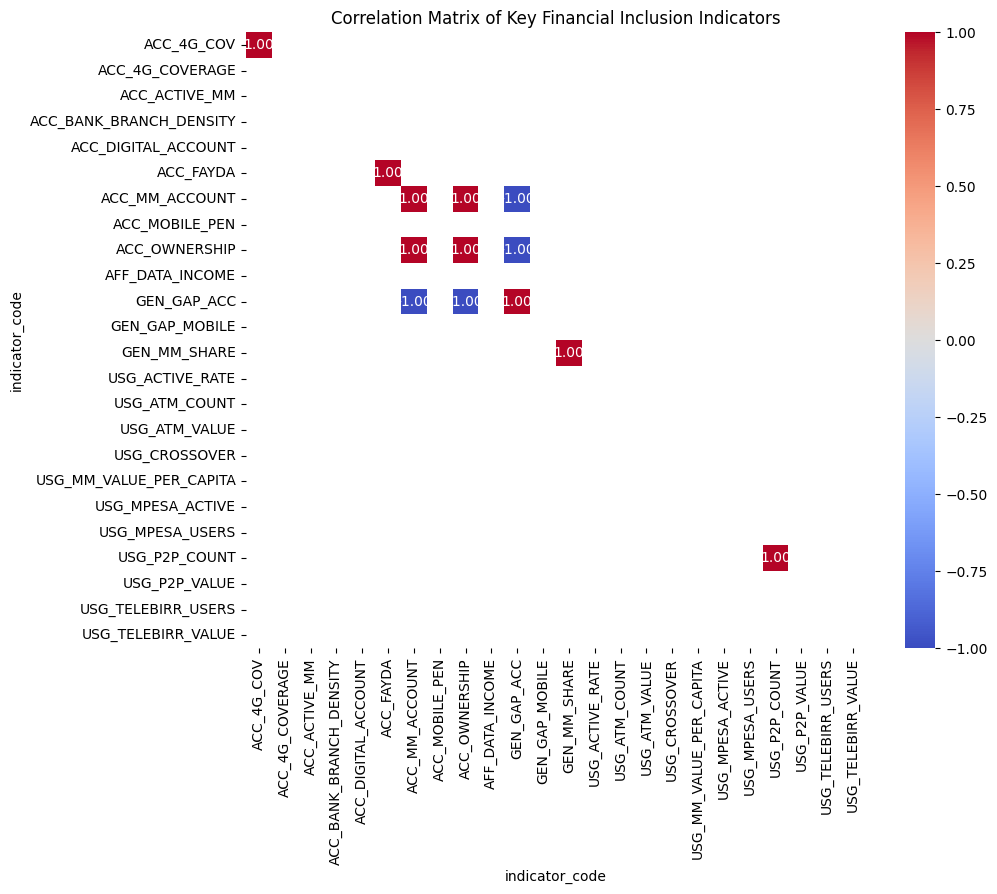

In [19]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Keep only relevant numeric rows
numeric_data = data[['observation_date', 'indicator_code', 'value_numeric']].dropna(subset=['value_numeric'])

# Pivot so each indicator_code becomes a column
df_corr = numeric_data.pivot_table(
    index='observation_date', 
    columns='indicator_code', 
    values='value_numeric'
)

# Compute correlation
corr_matrix = df_corr.corr()

# Plot correlation heatmap
plt.figure(figsize=(10,8))
sns.heatmap(corr_matrix, annot=True, fmt=".2f", cmap="coolwarm", cbar=True)
plt.title("Correlation Matrix of Key Financial Inclusion Indicators")
plt.show()
